# A Python Quick Start Tutorial
# Lesson \#2 : More on Data Types & Loops
## by Peter Mackenzie-Helnwein
University of Washington, Seattle, WA

pmackenz@uw.edu          
https://www.ce.washington.edu/facultyfinder/peter-mackenzie-helnwein

## Resources (reminder)

   1. Python Docs: https://docs.python.org/3/
   
   1. Python Tutorial (comprehensive): https://docs.python.org/3/tutorial/index.html
   
   1. Python Library Reference (the nitty-gritty details): https://docs.python.org/3/library/index.html
   
   1. Everything else: http://google.com
   

## Discussing questions from the self-study assignment

This section is to discuss your questions


### Summary of our previous session

This is the short version of all we achieved working together during our previous session.  We will be using this for further examples.

**Theory**:
Stress transformation

$$
\begin{aligned}
\sigma_{x}' &= \sigma_{x} \cos^2\theta + \sigma_{y} \sin^2\theta + 2\tau_{xy} \sin\theta \cos\theta \\
\sigma_{y}' &= \sigma_{x} \sin^2\theta + \sigma_{y} \cos^2\theta - 2\tau_{xy} \sin\theta \cos\theta \\
\tau_{xy}'  &= (\sigma_{y} - \sigma_{x}) \sin\theta \cos\theta + \tau_{xy} (\cos^2\theta - \sin^2\theta) \\
\end{aligned}
$$

**Given**:
Stress state:

$$
\sigma_{x} = 12~ksi~,
~~~
\sigma_{y} = -5.5~ksi~,
~~~
\tau_{xy} = 3.5~ksi 
$$

**Find**:
Components of stress in a rotated coordinate system for $\theta=25^\circ$.

In [4]:
# load needed functions from library module math
from math import sin,cos,radians

# define function(s)
def stressTransform(sigx, sigy, tauxy, theta):

    th = radians(theta)

    sx  = sigx * cos(th)**2 + sigy * sin(th)**2 + 2*tauxy * sin(th) * cos(th)
    sy  = sigx * sin(th)**2 + sigy * cos(th)**2 - 2*tauxy * sin(th) * cos(th)
    txy = (sigy - sigx) * sin(th) * cos(th) + tauxy * (cos(th)**2 - sin(th)**2) 
    
    return (sx,sy,txy)

# define some input parameters
sigma_x = 12.
sigma_y = -5.5
tau_xy = 3.5

# use that function
template = "sigma_x={:12.6f} ksi\nsigma_y={:12.6f} ksi\ntau_xy ={:12.6f} ksi\n"  # \n go to the next line
print(template.format(*stressTransform(sigma_x, sigma_y, tau_xy, 0)))  # * refers to the result of the function
print(template.format(*stressTransform(sigma_x, sigma_y, tau_xy, 25)))
print(template.format(*stressTransform(sigma_x, sigma_y, tau_xy, 180)))

sigma_x=   12.000000 ksi
sigma_y=   -5.500000 ksi
tau_xy =    3.500000 ksi

sigma_x=   11.555547 ksi
sigma_y=   -5.055547 ksi
tau_xy =   -4.453132 ksi

sigma_x=   12.000000 ksi
sigma_y=   -5.500000 ksi
tau_xy =    3.500000 ksi



## Exercise 1: List versus dictionary

You could express the stress state as

1. three independent variables - the way we did it thus far

2. a list of three values: `stress = `$[\sigma_x, \sigma_y, \tau_{xy}]$ and replace

        sigma_x --> stress[0]
        sigma_y --> stress[1]
        tau_xy  --> stress[2]
        
3. a dictionary 

        stress = {'sigx': 12.0, 'sigy': -5.5, 'tau':3.50}
        
   and replace

        sigma_x --> stress['sigx']
        sigma_y --> stress['sigy']
        tau_xy  --> stress['tau']

**Discuss**:

1. Pros and cons for coding the equations
2. Pros and cons for coding the function(s)
3. How woud code and function change when switching from 2D to 3D (6 components instead of 3 components)

**Implement**:
An alternative version of the `stressTransform(...)` function using a dictionary as defined under item 3. above.

In [18]:
# load needed functions from library module math
from math import sin,cos,radians

def stressTransform2(stress, theta): # human readable code when using dictionary ; just one variable; header is easier
    # YOUR CODE HERE ...
  
    th = radians(theta)
    
    # pulling out components of stress
    
    sigx = stress['sigx']
    sigy = stress['sigy']   
    tauxy = stress['tau']

    sx  = sigx * cos(th)**2 + sigy * sin(th)**2 + 2*tauxy * sin(th) * cos(th)
    sy  = sigx * sin(th)**2 + sigy * cos(th)**2 - 2*tauxy * sin(th) * cos(th)
    txy = (sigy - sigx) * sin(th) * cos(th) + tauxy * (cos(th)**2 - sin(th)**2) 
    
    # return (sx,sy,txy)
    stress_out = {'sigx': sx, 'sigy': sy, 'tau':txy}   # sx sy and txy are local variables defined inside the def
    
    # stress_out is another dictionary containing the transformed stress
    return stress_out  #return the dictionary , with curly paranthesis

Initialize given stress

In [19]:
given_stress = {'sigx': 12.0, 'sigy': -5.5, 'tau':3.50} 

In [20]:
stressTransform2(given_stress, 25)

{'sigx': 11.555547135673642,
 'sigy': -5.055547135673642,
 'tau': -4.453132243388171}

Add some nice print out for all transformation angles in the $\theta$-list 

In [40]:
theta_list = [0., 25., 45., 75., 90., 180.]

#template = "theta={th:8.3f}:\n sigma_x={sigx:12.6f} ksi\nsigma_y={sigy:12.6f} ksi\ntau_xy ={tau:12.6f} ksi\n"

#template = """theta={th:8.3f}:  #here we do not need to use \n
#    sigma_x={sigx:12.6f} ksi
#   sigma_y={sigy:12.6f} ksi
#    tau_xy ={tau:12.6f} ksi
#"""

template = "{th:8.3f}, {sigx:12.6f}, {sigy:12.6f}, {tau:12.6f}"  # comma seperated format


# YOUR CODE HERE ...

for theta in theta_list:
    stress = stressTransform2(given_stress, theta)
    # print(theta, stress)
    # print(template.format(theta, stress['sigx'], stress['sigy'], stress['tau']))
    # print(template.format(th=theta, a=stress['sigx'], b=stress['sigy'], c=stress['tau']))
    print(template.format(th=theta, **stressTransform2(given_stress, theta)))
    


   0.000,    12.000000,    -5.500000,     3.500000
  25.000,    11.555547,    -5.055547,    -4.453132
  45.000,     6.750000,    -0.250000,    -8.750000
  75.000,    -2.577722,     9.077722,    -7.406089
  90.000,    -5.500000,    12.000000,    -3.500000
 180.000,    12.000000,    -5.500000,     3.500000


In [ ]:
stress_as_list = [12, -5.5, 3.50 ]  # previous exercise when stress was a list not dic
*stress_as_list ==> 12.0 -5.5 3.50

In [44]:
given_stress = {'sigx': 12.0, 'sigy': -5.5, 'tau':3.50} 
**given_stress ==> sigx=12.0 sigy=-5.5 tau=3.5

SyntaxError: invalid syntax (2800400117.py, line 2)

In [48]:
for val in given_stress.values:
    #print(val)
    print(key,'=>,')

TypeError: 'builtin_function_or_method' object is not iterable

### Exercise 2 : Boolean variables

Badly formulated boolean expressions are a common source for faulty code.  This exercise shall emphasize how easy it is to misinterpret conditions.  Moreover, we will explore ways to test and improve our conditions.

**Your Task**:
predict the data type and value of the following boolean expressions.  Is this `True` or `False`?

    17 <= 365/21  and  'Monday' < 'Friday'

    'Monday'  < 'Friday'  or  cos( 3.1427 )

    (100 - 99) and sin( 3.14127/3 )  or  'Friday' > 'Monday'
    
    (100 - 99) and sin( 3.14127/3 )  and 'Friday' > 'Monday'
    
    (100 - 99) or sin( 3.14127/3 )  and 'Friday' > 'Monday'
    
    ( (100 - 99) or sin( 3.14127/3 ) )  and 'Friday' > 'Monday'
    
    ( (100 - 99) and sin( 3.14127/3 ) ) or 'Friday' > 'Monday'
    
Write a simple test function that tells you how the computer interprets the result:


In [50]:
17 <= 365/21  and  'Monday' < 'Friday' # M is after F in alphabets, so the second part is false

False

In [55]:
(100 - 99) and sin( 3.14127/3 )  or  'Friday' > 'Monday'  # True and True (nonzero value); output of the last computation, sin; when the first part is true it does not even look at the second part

0.865971623177473

In [61]:
day_question = 'Friday' > 'Monday'
val_question = (100 - 99) or sin( 3.14127/3 )

cond3= val_question and day_question

if cond3:
    print("peter is happy")
else:
    print("peter is sad")

peter is sad


In [62]:
from math import sin

def test(cond):
    if cond:
        print("cond => {} => is True".format(cond))
    else:
        print("cond => {} => is False".format(cond))


In [63]:
cd = (100 - 99) and ( sin( 3.14127/3 ) or 'Friday' > 'Monday' )
test(cd)

cond => 0.865971623177473 => is True


In [64]:
if 'False':  #if there is something in the string, print true otherwise false
    print('True')  
else:
    print('False')

True


In [69]:
DEBUG_MODE = True

want_a_beer = True

if DEBUG_MODE:
    ans = want_a_beer or not want_a_beer
    print(ans)

True


In [71]:
for A in [True, False]:
    print (A and (not A))  # can't be false and true at the same time so false
    
for A in [True, False]:
    print (A or (not A))

False
False
True
True


### Exercise 3 : Writing efficient loops in python

**Given**:
Three lists containing $\theta$, $y_1=\sin\theta$, and $y_2=\cos\theta$.


In [73]:
for i in range(10):
    print(i)

0
1
2
3
4
5
6
7
8
9


In [74]:
list(range(10+1))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [75]:
from math import pi, sin, cos

# set a parameter: N is an integer >= 1
N = 10

# initialize the lists
theta = []
y1 = []
y2 = []

# run this to populate the lists
th = 0.0

for i in range(N+1):
    theta.append(th)  # creating lists 
    y1.append(sin(th))
    y2.append(cos(th))
    th += pi/N

In [76]:
theta

[0.0,
 0.3141592653589793,
 0.6283185307179586,
 0.9424777960769379,
 1.2566370614359172,
 1.5707963267948966,
 1.8849555921538759,
 2.199114857512855,
 2.5132741228718345,
 2.827433388230814,
 3.141592653589793]

In [77]:
y1

[0.0,
 0.3090169943749474,
 0.5877852522924731,
 0.8090169943749475,
 0.9510565162951535,
 1.0,
 0.9510565162951536,
 0.8090169943749475,
 0.5877852522924732,
 0.3090169943749475,
 1.2246467991473532e-16]

In [78]:
y2

[1.0,
 0.9510565162951535,
 0.8090169943749475,
 0.5877852522924731,
 0.30901699437494745,
 6.123233995736766e-17,
 -0.30901699437494734,
 -0.587785252292473,
 -0.8090169943749473,
 -0.9510565162951535,
 -1.0]

**Your Task**:
Write a loop that prints a table

~~~
theta   sin(theta)    cos(theta)
...
~~~

1. Assume you do not know how many elements are in those lists => you'll have to figure it out
2. use as few variables as possible
3. The shortest working solution requires only two lines of code (more are OK, of course).

**Hint**: 
If you got time left, check out the `zip` command.

In [81]:
for i in range(len(theta)): # this will crash when for example legth of y1 is bigger than length of theta; so use zip
    # print(theta[i], y1[i], y2[i])
    print ("{:12.4f} {:12.6f} {:12.6f}".format(theta[i], y1[i], y2[i]))
    

      0.0000     0.000000     1.000000
      0.3142     0.309017     0.951057
      0.6283     0.587785     0.809017
      0.9425     0.809017     0.587785
      1.2566     0.951057     0.309017
      1.5708     1.000000     0.000000
      1.8850     0.951057    -0.309017
      2.1991     0.809017    -0.587785
      2.5133     0.587785    -0.809017
      2.8274     0.309017    -0.951057
      3.1416     0.000000    -1.000000


In [82]:
for th, X1, X2 in zip(theta,y1,y2): #zip theta y1 and y2 in one tuple, each will be a column
    print (f"{th:12.4f} {X1:12.6f} {X2:12.6f}")

      0.0000     0.000000     1.000000
      0.3142     0.309017     0.951057
      0.6283     0.587785     0.809017
      0.9425     0.809017     0.587785
      1.2566     0.951057     0.309017
      1.5708     1.000000     0.000000
      1.8850     0.951057    -0.309017
      2.1991     0.809017    -0.587785
      2.5133     0.587785    -0.809017
      2.8274     0.309017    -0.951057
      3.1416     0.000000    -1.000000


In [ ]:
from numpy import array
N = array([ len(theta), len(y1), len(y2) ]).min()

for i in range(N):
    print("{:12.6f}  {:12.6f}  {:12.6f}".format(theta[i],y1[i],y2[i]))

In [ ]:
print("     theta            y1            y2  ")
print(40*"=")
for row in zip(theta, y1, y2):
    print("{:12.6f}  {:12.6f}  {:12.6f}".format(*row))

Note the important trick:

Loop over **items** in a list, NOT by index!  This makes code more compact and much better readable.

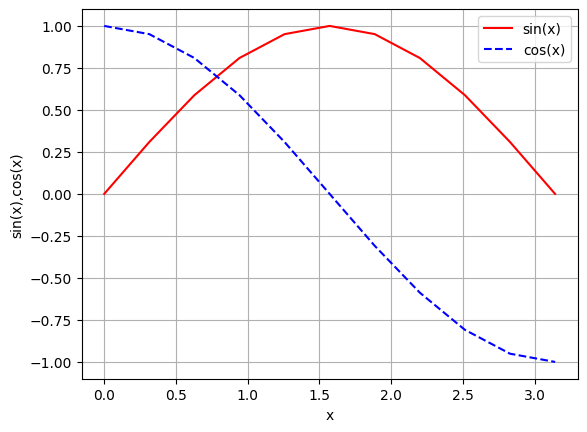

In [96]:
import matplotlib.pyplot as plt

plt.plot(theta, y1,'-r', label='sin(x)')  # from the plt interface use plot
plt.plot(theta, y2,'--b', label='cos(x)')
plt.xlabel('x')
plt.ylabel('sin(x),cos(x)')
plt.legend()
plt.grid()
#plt.savefig("myfigure.png",dpi=300)
plt.savefig("myfigure.pdf")
plt.show()

### Exercise 4: Looping over dictionaries

**Given**:
A dictionary `your_course` is given as follows (please do a `shift-enter` to initialize it)

In [97]:
your_course = {
               'department':'CEE',
               'group':'CESG',
               'number':'505 A&B',
               'complexity':10,
               'workload':0,
               'credits':3,
               'instructor':'Dr Peter'
              }

**Your tasks**:
1. Write a loop to print all keys, one per line

In [107]:
for x in your_course:
    print(x)

department
group
number
complexity
workload
credits
instructor


2. Change complexity to 6 and workload to 8

3. copy and modify the loop from 1. to print "key: value", one per line

4. Write a condition that checks if `your_course` has a field named `'expected_grade'`.
    - If the field DOES exist, print **"Field exists with value of {:3.1f}".format(_the value associated with that key_)"**
    - If the field DOES NOT exist, create it and assign a sensible value, the print **"Field created with value of {:3.1f}".format(_the value associated with that key_)"**

Execute the above code again to verify that the new key/value pair was added

In [ ]:
# just copy the code from two cells above

In [ ]:
# repeat the code that prints key/value pairs

## Homework questions

We can all learn from your questions!